In [2]:
import sys
sys.path.append('../')
import numpy as np
import hallgerd
import matplotlib
import pylab as plt
plt.style.use('dark_background')

In [3]:
from hallgerd.core import Sequential
from hallgerd.layers import Dense

In [4]:
def xor(x1, x2):
    if 1 / (x1 * x1) + 1 / (x2 * x2) > 4:
#     if x1*x1 + x2*x2 < 3:
        return 1
    return 0

vxor = np.vectorize(xor)
X = np.random.randn(10000, 2, )
y = vxor(X[:, 0], X[:, 1])
X = X.T
y = y.reshape((1, -1))

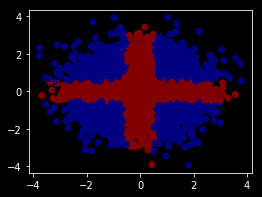

In [5]:
plt.figure(figsize=(4,3))
plt.scatter(X[0], X[1], c=y[0], cmap=matplotlib.cm.jet)
plt.show()

In [6]:
X.shape

(2, 10000)

In [10]:
model = Sequential(lr=1e-2, batch_size=256, epochs=64)
model.add(Dense(2, 4))
model.add(Dense(4, 1))
model.fit(X, y)

100%|██████████| 64/64 [00:13<00:00,  4.58it/s]


In [11]:
ypp = model(X)[0]
yp = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    yp[i] = 1 if ypp[i] >= 0.5 else 0

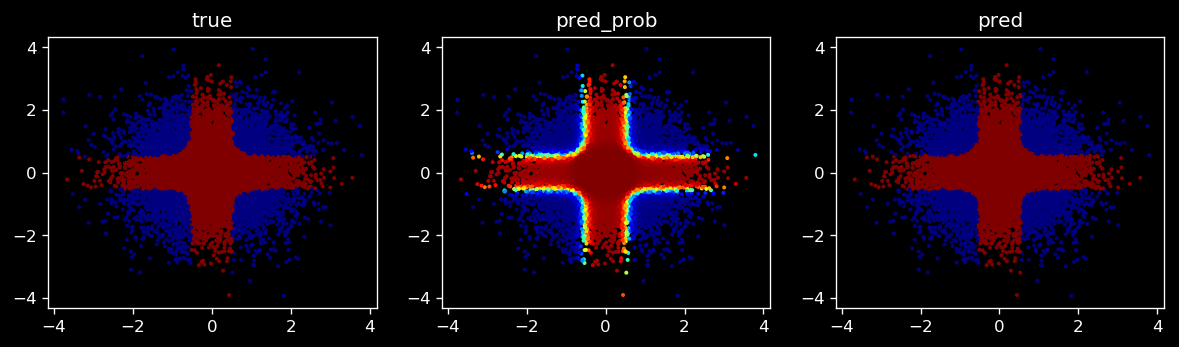

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3), dpi=120)
ax[0].scatter(X[0], X[1], c=y[0], s=2, cmap=matplotlib.cm.jet)
ax[1].scatter(X[0], X[1], c=ypp, s=2, cmap=matplotlib.cm.jet)
ax[2].scatter(X[0], X[1], c=yp, s=2, cmap=matplotlib.cm.jet)
ax[0].set_title('true')
ax[1].set_title('pred_prob')
ax[2].set_title('pred')
plt.show()